Company Background

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK.
The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months.
The sales team have reached out to the data science team to get help with this problem.

Customer Question

The sales team wants to know:

Can you predict the price that a used car should be listed at based on features of the
car?

Success Criteria

It is known that cars that are more than £1500 from the estimated price will not sell. The sales
team wants to know whether you can make predictions within this range.

Data Dictionary

The data is available in a DataCamp Workspace, which you can find from the certification
dashboard. The data set has the following columns:

Column Name Details

model Character, the model of the car, 18 possible values

year Numeric, year of manufacture from 1998 to 2020

price Numeric, listed value of the car in GBP

transmission Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"

mileage Numeric, listed mileage of the car at time of sale

fuelType Character, one of "Petrol", "Hybrid", "Diesel" or "Other"

tax Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car.

mpg Numeric, miles per gallon as reported by manufacturer

engineSize Numeric, listed engine size, one of 16 possible values


In [67]:
install.packages("CatEncoders")
install.packages("Metrics")
install.packages("rpart")
install.packages("rpart.plot")

Installing CatEncoders [0.1.1] ...
	OK [linked cache]
Installing Metrics [0.1.4] ...
	OK [linked cache]
Installing rpart [4.1.19] ...
	OK [linked cache]
Installing rpart.plot [3.1.1] ...
	OK [linked cache]


In [68]:
library(tidyverse)
library(CatEncoders)
library(Metrics)
library(rpart)
library(rpart.plot)

In [69]:
car <- read_csv("toyota.csv")

Rows: 6738 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): model, transmission, fuelType
dbl (6): year, price, mileage, tax, mpg, engineSize

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [70]:
summary(car)

    model                year          price       transmission      
 Length:6738        Min.   :1998   Min.   :  850   Length:6738       
 Class :character   1st Qu.:2016   1st Qu.: 8290   Class :character  
 Mode  :character   Median :2017   Median :10795   Mode  :character  
                    Mean   :2017   Mean   :12522                     
                    3rd Qu.:2018   3rd Qu.:14995                     
                    Max.   :2020   Max.   :59995                     
    mileage         fuelType              tax             mpg        
 Min.   :     2   Length:6738        Min.   :  0.0   Min.   :  2.80  
 1st Qu.:  9446   Class :character   1st Qu.:  0.0   1st Qu.: 55.40  
 Median : 18513   Mode  :character   Median :135.0   Median : 62.80  
 Mean   : 22857                      Mean   : 94.7   Mean   : 63.04  
 3rd Qu.: 31064                      3rd Qu.:145.0   3rd Qu.: 69.00  
 Max.   :174419                      Max.   :565.0   Max.   :235.00  
   engineSize   
 Mi

In [71]:
head(car)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
GT86,2016,16000,Manual,24089,Petrol,265,36.2,2
GT86,2017,15995,Manual,18615,Petrol,145,36.2,2
GT86,2015,13998,Manual,27469,Petrol,265,36.2,2
GT86,2017,18998,Manual,14736,Petrol,150,36.2,2
GT86,2017,17498,Manual,36284,Petrol,145,36.2,2
GT86,2017,15998,Manual,26919,Petrol,260,36.2,2


In [72]:
car$year <- as.factor(car$year)
car$transmission <- as.factor(car$transmission)
car$fuelType <- as.factor(car$fuelType)


In [73]:
summary(car)

    model                year          price          transmission 
 Length:6738        2017   :2019   Min.   :  850   Automatic:2657  
 Class :character   2019   :1286   1st Qu.: 8290   Manual   :3826  
 Mode  :character   2018   :1015   Median :10795   Other    :   1  
                    2016   : 997   Mean   :12522   Semi-Auto: 254  
                    2015   : 525   3rd Qu.:14995                   
                    2014   : 352   Max.   :59995                   
                    (Other): 544                                   
    mileage         fuelType         tax             mpg        
 Min.   :     2   Diesel: 503   Min.   :  0.0   Min.   :  2.80  
 1st Qu.:  9446   Hybrid:2043   1st Qu.:  0.0   1st Qu.: 55.40  
 Median : 18513   Other : 105   Median :135.0   Median : 62.80  
 Mean   : 22857   Petrol:4087   Mean   : 94.7   Mean   : 63.04  
 3rd Qu.: 31064                 3rd Qu.:145.0   3rd Qu.: 69.00  
 Max.   :174419                 Max.   :565.0   Max.   :235.00  
 

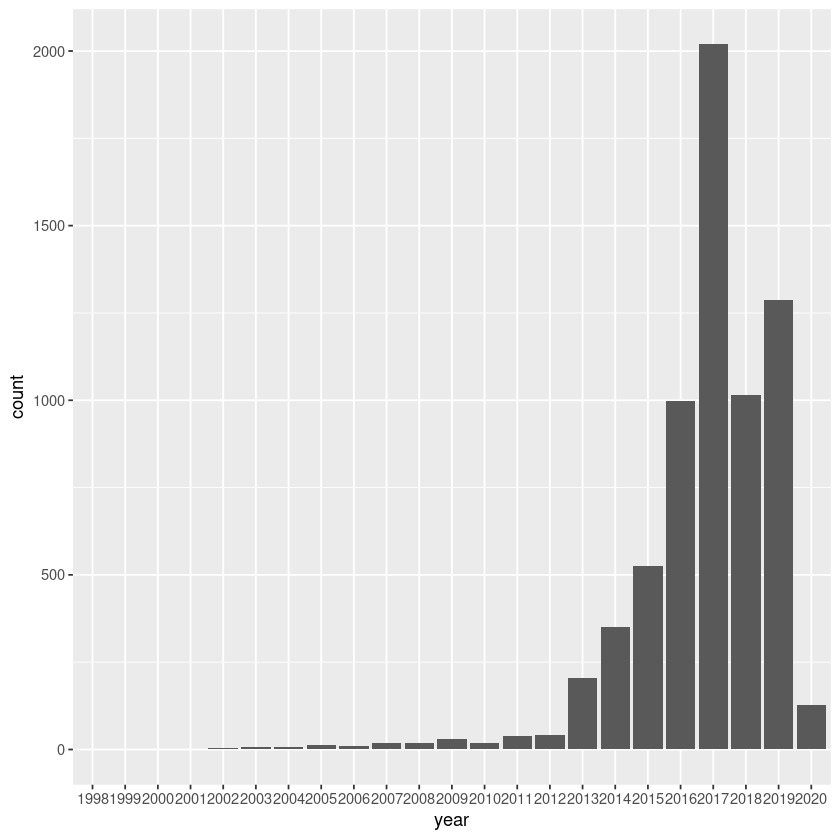

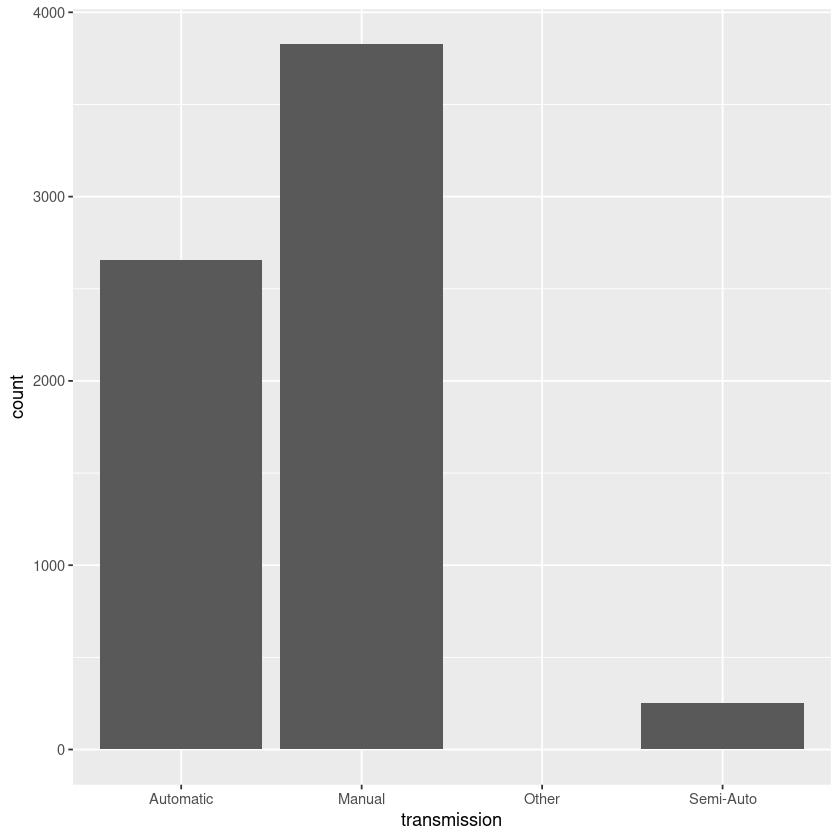

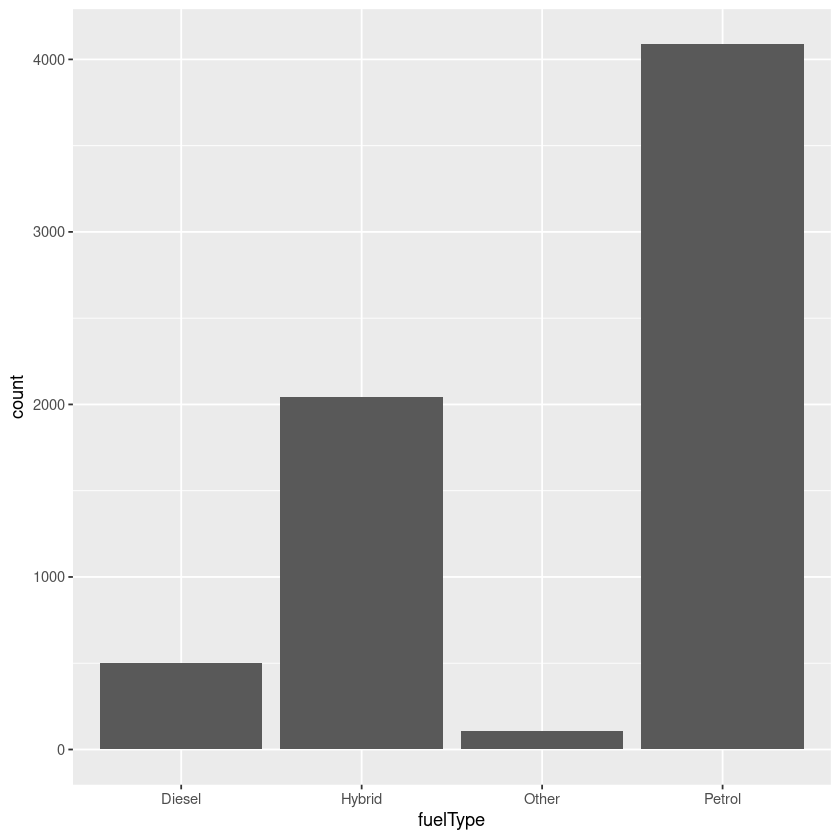

In [74]:
ggplot(car, aes(year)) + geom_bar() 
ggplot(car, aes(transmission)) + geom_bar() 
ggplot(car, aes(fuelType)) + geom_bar() 


In [125]:
car %>% group_by(year) %>% count() 

New names:
• `` -> `...1`


year,n
<fct>,<int>
1998,1
1999,1
2000,1
2001,1
2002,4
2003,6
2004,7
2005,12
2006,11


a grande maioria é movido a petroleo, com transmissão manual e de 2017

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


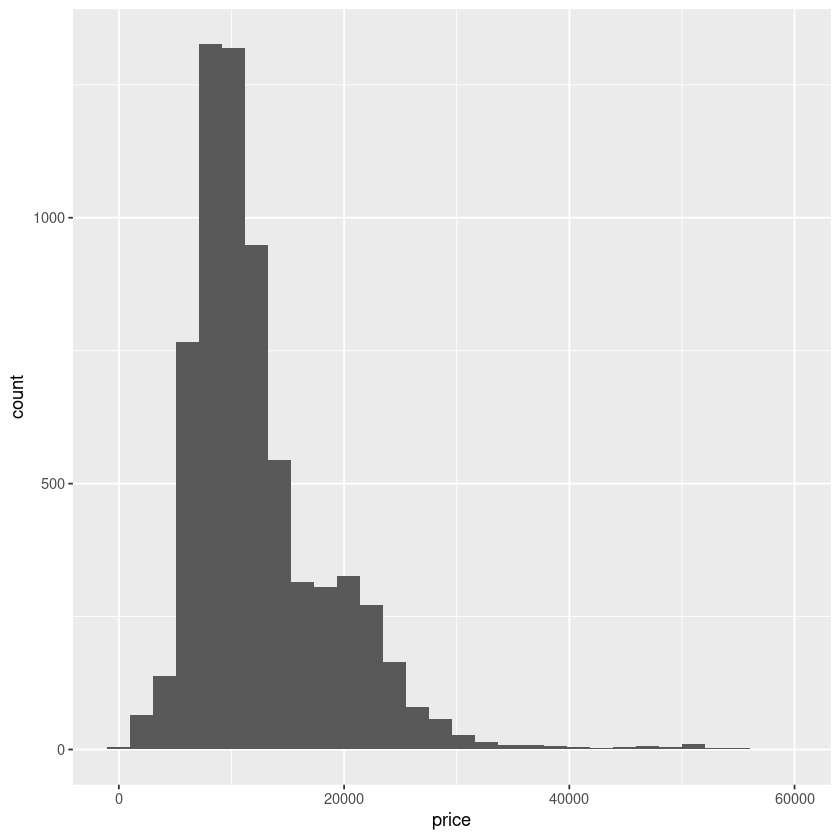

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


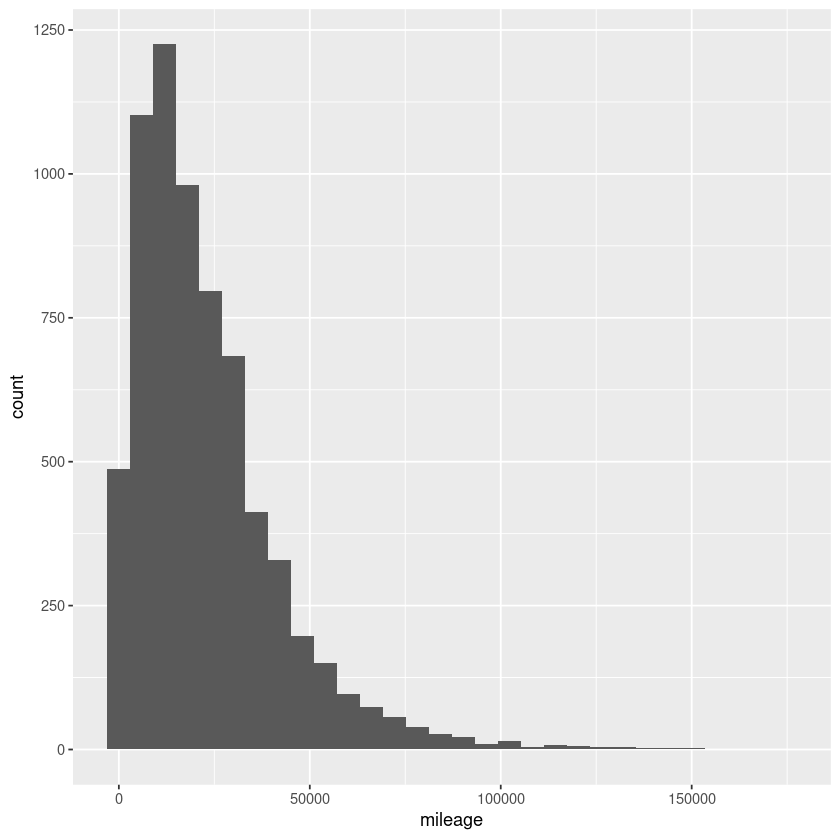

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


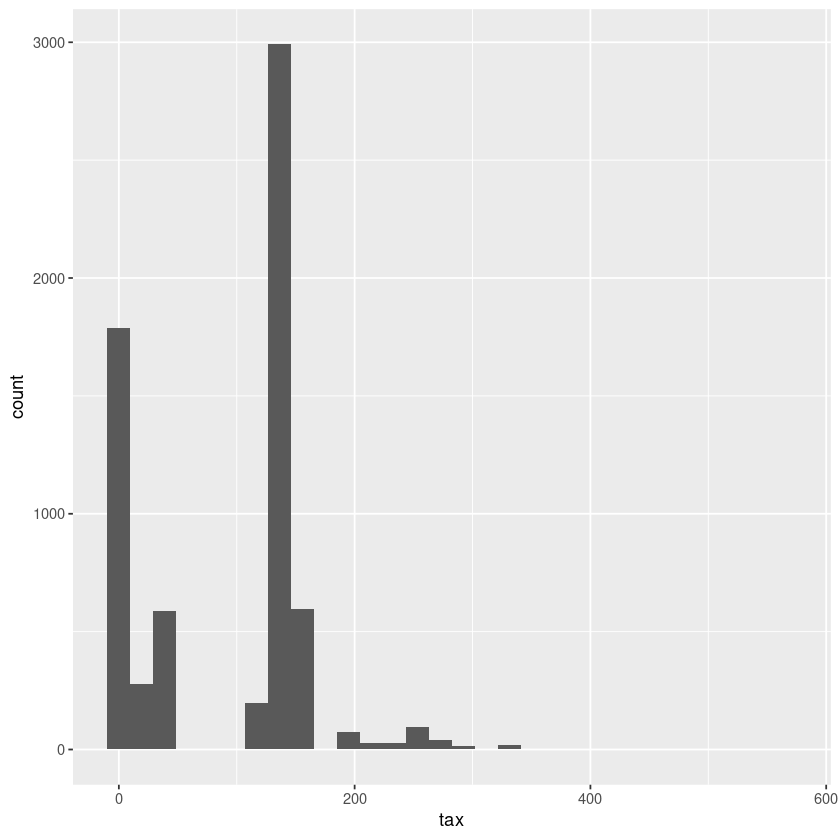

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


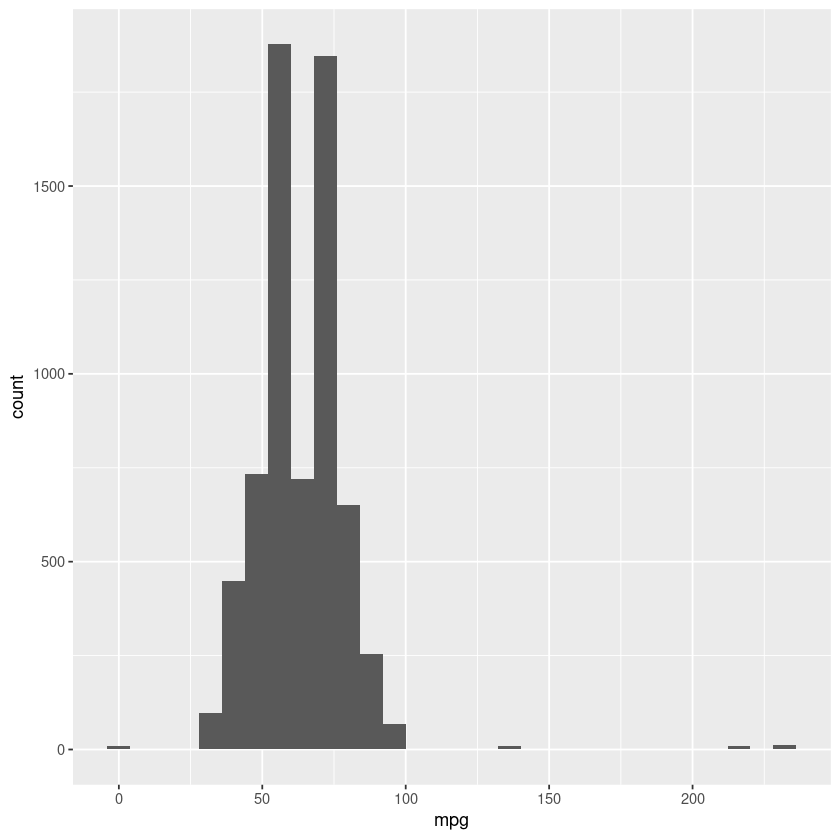

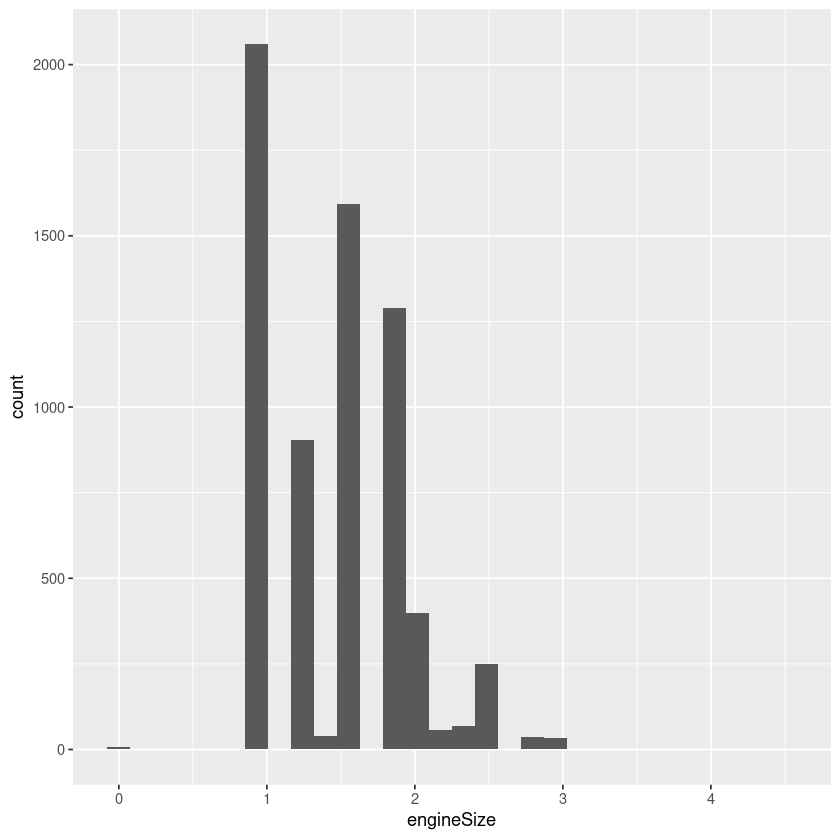

In [75]:
ggplot(car, aes(price)) + geom_histogram()
ggplot(car, aes(mileage)) + geom_histogram()
ggplot(car, aes(tax)) + geom_histogram()
ggplot(car, aes(mpg)) + geom_histogram()
ggplot(car, aes(engineSize)) + geom_histogram()

como preço é a variavel target e está lateralizada com uma longa cauda, vale tentar por em base logarítma 

In [76]:
car$pricelog <- log(car$price)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


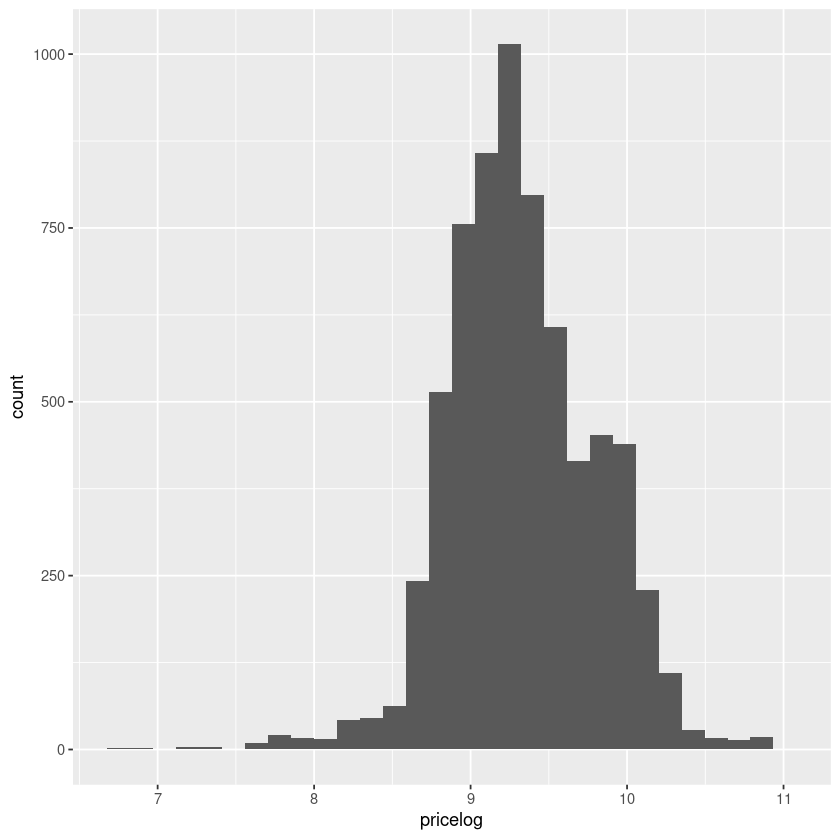

In [77]:
ggplot(car, aes(pricelog)) + geom_histogram()

parece melhor centralizado para continuar a analise

In [78]:
cor(car$pricelog, car$mileage)
cor(car$price, car$mileage)
cor(car$pricelog, car$tax)
cor(car$price, car$tax)
cor(car$pricelog, car$mpg)
cor(car$price, car$mpg)
cor(car$pricelog, car$engineSize)
cor(car$price, car$engineSize)

[1] -0.3927672

[1] -0.2979358

[1] 0.1952181

[1] 0.2144983

[1] 0.009899686

[1] -0.03991044

[1] 0.686285

[1] 0.7275925

varia levemente a correlação usando a coluna preço original ou na base log, mas nada extremamente relevante
o tamanho do motor tem uma forte correlação c o preço, bem como uma correlação negativa razoável entre a mileage e preço (o que faz muito sentido, quanto menos rodado mais valorizado)
enquanto isso, mpg tem correlação muito proxima de 0 (o que significa nenhuma)

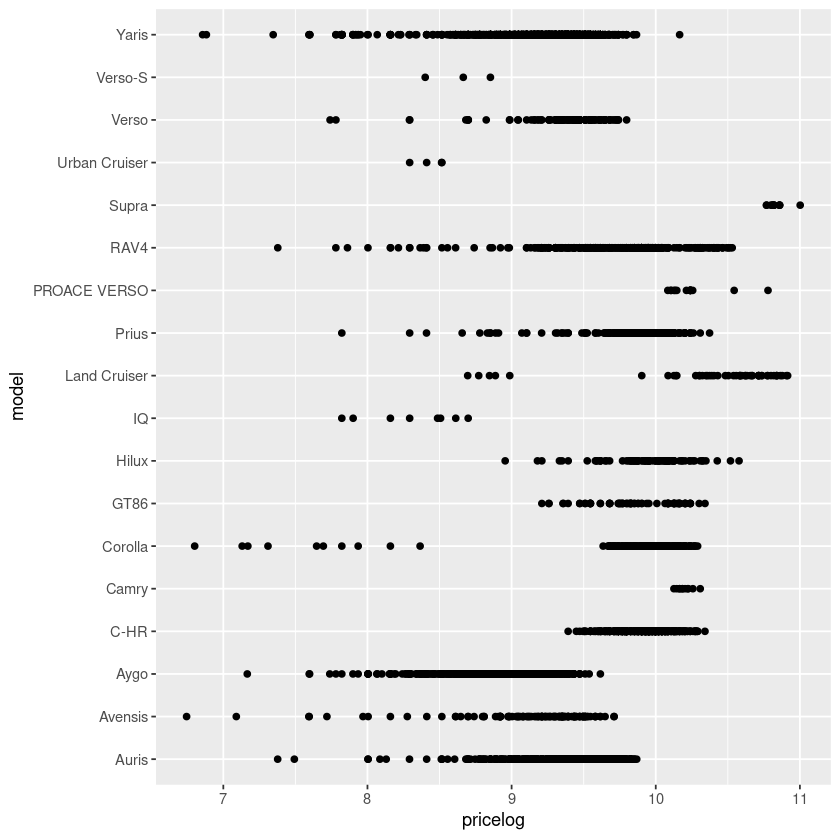

In [79]:
ggplot(car, aes(pricelog, model)) + geom_point()



é possivel ver que o modelo supra tem preços bem elevados sempre, enquanto outros modelos variam em faixa mais distinta de preços (corolla pode ser bem barato ou bem caro). Não analisei modelo vs outras variaveis, mas é possivel que o corolla tenha uma faixa mais distinta de ano ou mileage

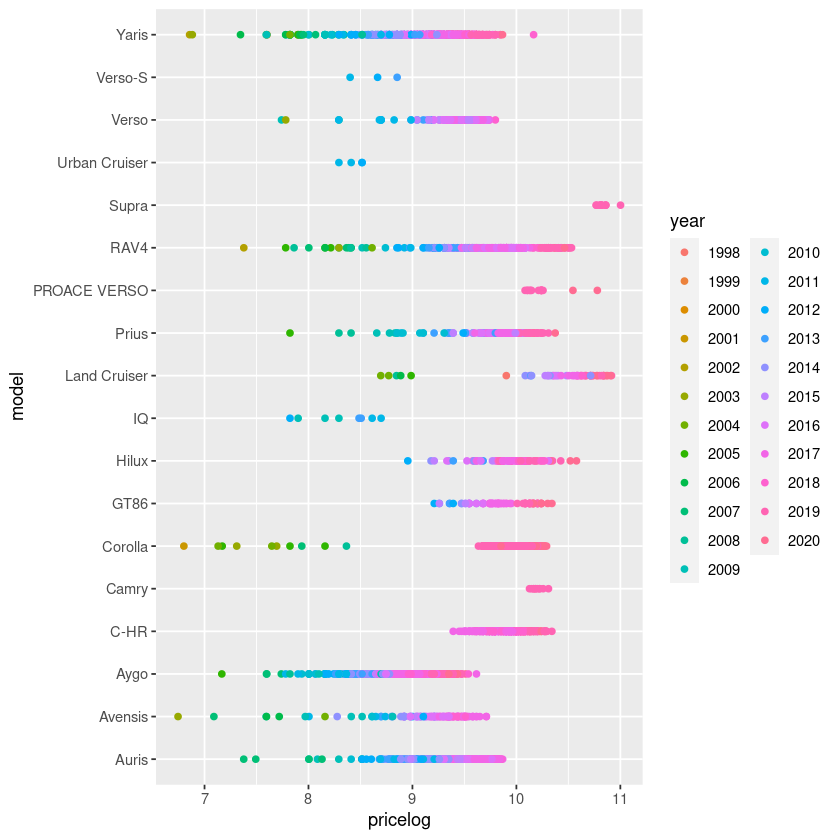

In [80]:
ggplot(car, aes(pricelog, model, color = year)) + geom_point()

de fato, como imaginado, os modelos que tem preços mais condensados na mesma faixa são modelos de anos mais similares, enquanto modelos que tem preços mais variados são de modelos que existem a mais tempo e por isso vende-se de diversos anos (sendo os mais antigos mais baratos)

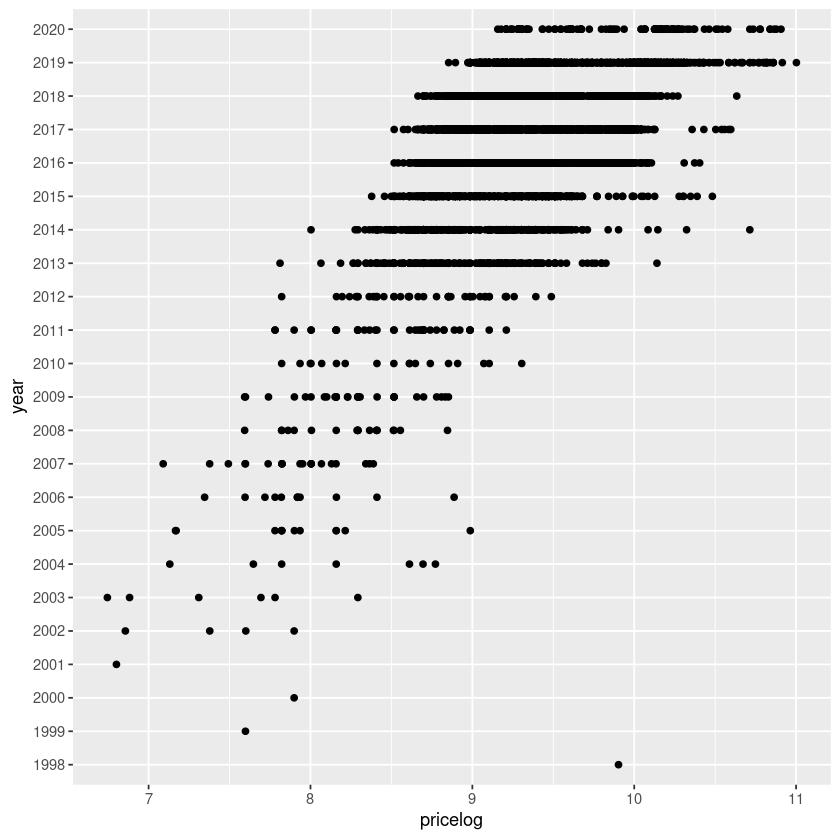

In [81]:
ggplot(car, aes(pricelog, year)) + geom_point()


já havia sido possivel analisar um pouco do preço vs ano ao comparar com modelo no gráfico em que ano foi a cor, mas analisando somente ano é possivel ver que há uma tendencia de modelos mais novos serem mais caros, tirando o modelo de 98 (um unico ponto) que representa um valor mais alto, provavelmente seja algum carro de colecionador ou algo do estilo - vale a pena investigar.

In [82]:
car %>% filter(year==1998)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog
<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Land Cruiser,1998,19990,Manual,1e+05,Diesel,265,23.9,4.2,9.902987


land cruiser é um carro com um enginesize bem superior a média, e esse de 98 é um que ficou acima de outros do mesmo modelo de anos mais novos

In [83]:
car %>% filter(model == 'Land Cruiser') 

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog
<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Land Cruiser,2019,39498,Semi-Auto,11712,Diesel,145,30.1,2.8,10.584005
Land Cruiser,2016,33000,Semi-Auto,22583,Diesel,300,38.2,2.8,10.404263
Land Cruiser,2020,44995,Semi-Auto,200,Diesel,150,30.1,2.8,10.714307
Land Cruiser,2015,32498,Automatic,16871,Diesel,325,34.9,3.0,10.388934
Land Cruiser,2019,39498,Semi-Auto,12543,Diesel,145,30.1,2.8,10.584005
Land Cruiser,2015,24995,Semi-Auto,75000,Diesel,330,34.9,3.0,10.126431
Land Cruiser,2014,23995,Manual,53252,Diesel,325,34.9,3.0,10.085601
Land Cruiser,2015,29070,Semi-Auto,45158,Diesel,325,34.9,3.0,10.277462
Land Cruiser,2019,42444,Semi-Auto,10083,Diesel,145,30.1,2.8,10.655941


de fato, mesmo sendo o mesmo modelo, o tamanho do motor do de 98 é bem superior aos dos anos 2000, o que faz sentido ter um preço superior então

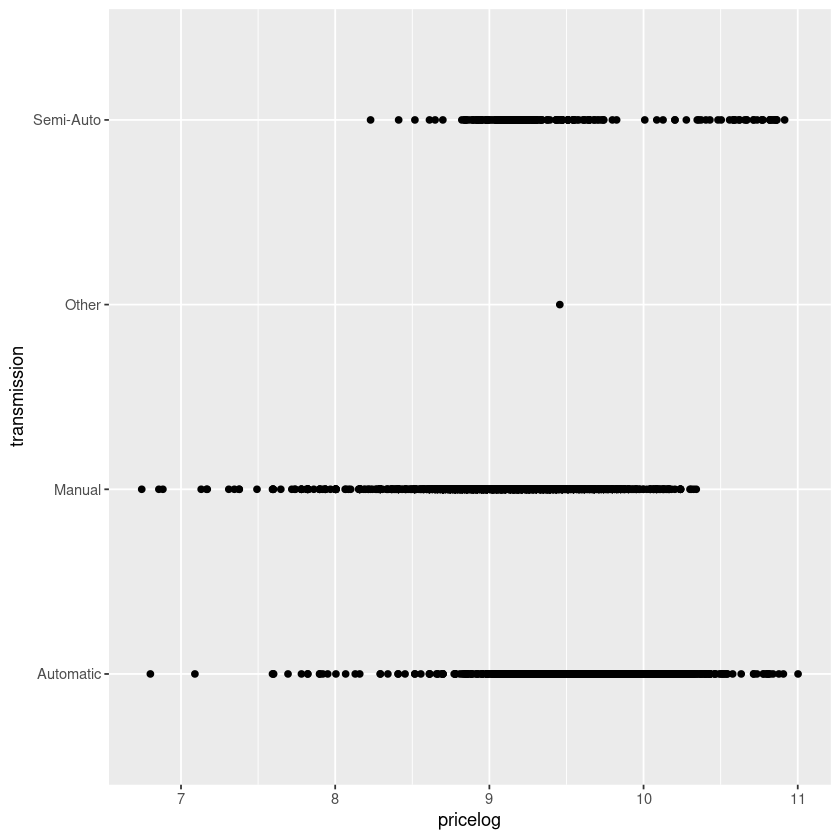

In [84]:
ggplot(car, aes(pricelog, transmission)) + geom_point()


carros manuais tendem a ser um pouco mais baratos e semi-auto mais caros, mas não é muito regra, os automaticos vão de uma extremidade a outra. Achei curioso haver um 'outros'

In [85]:
car %>% filter(transmission == 'Other')

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog
<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Yaris,2015,12795,Other,16733,Hybrid,0,78,1.5,9.45681


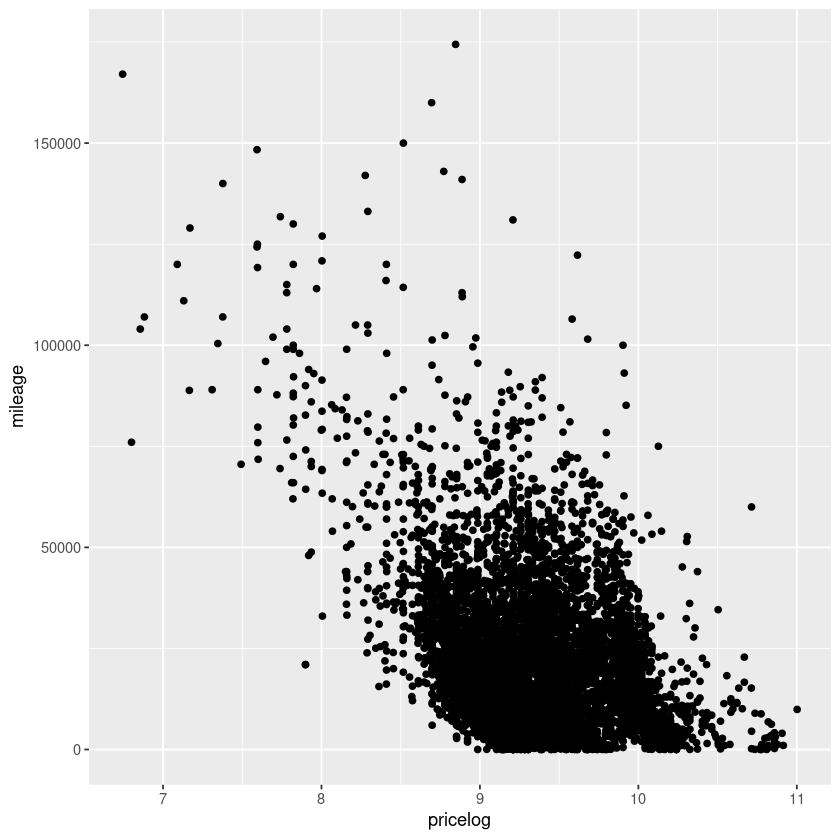

In [86]:
ggplot(car, aes(pricelog, mileage)) + geom_point()


dá para observar uma grande concentração em preços altos-baixa, mas é bem variado.

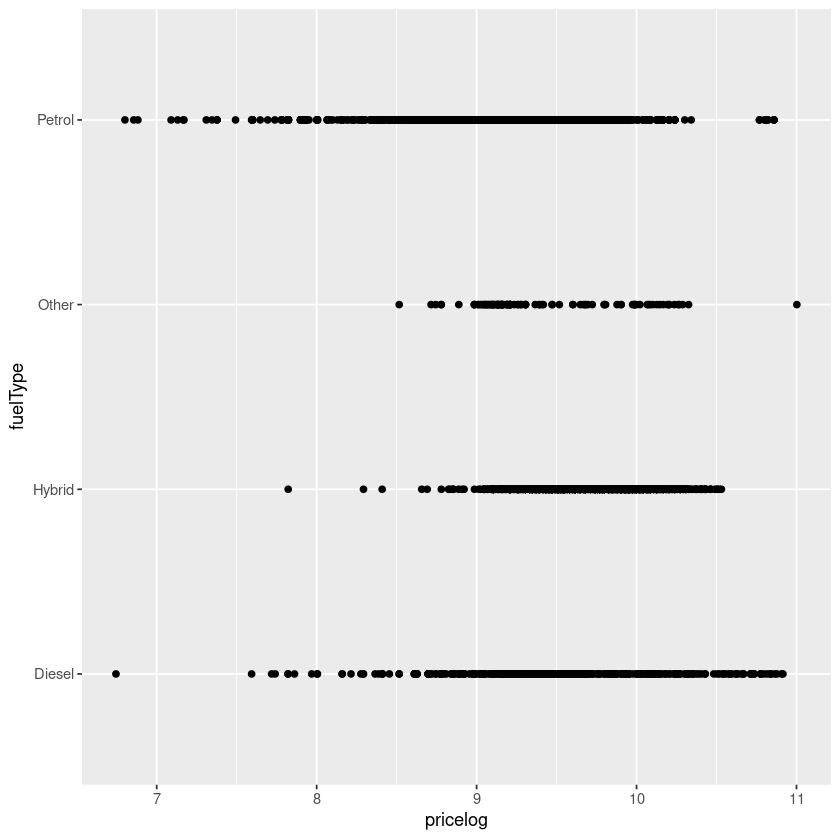

In [87]:
ggplot(car, aes(pricelog, fuelType)) + geom_point()


petroleo tem uma distribuição maior de preço, faz sentido

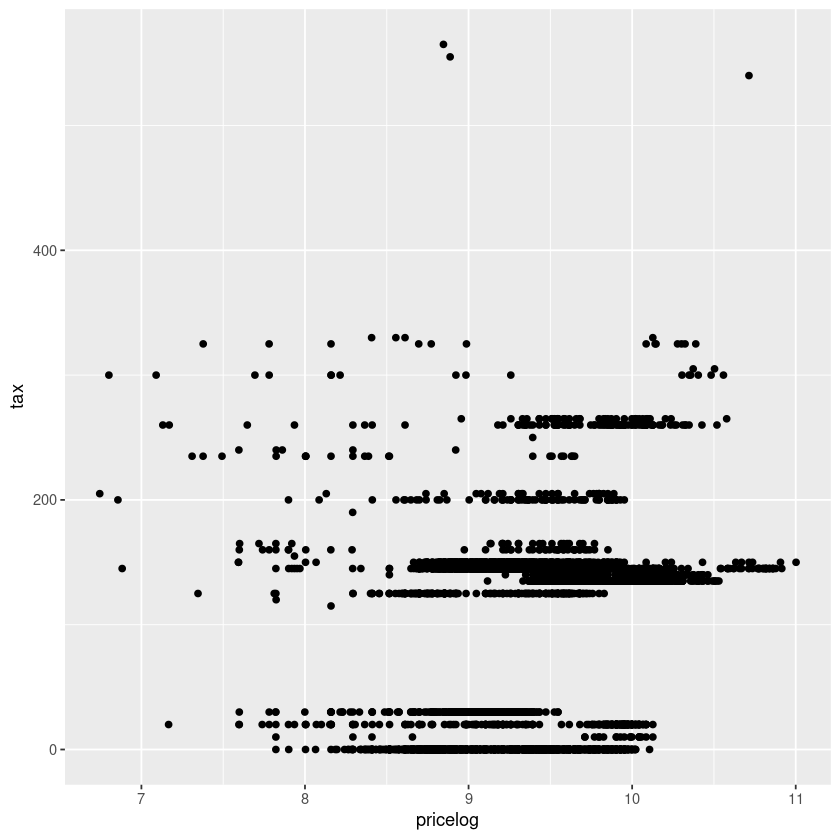

In [88]:
ggplot(car, aes(pricelog, tax)) + geom_point()


conceito de 'road tax' é novo para o que estou acostumada, é fácil de observar que realmente são faixas, mas os preços sãol bem variáveis. Por curiosidade, vou observar como o fuel type e year se comportam junto ao tax. 

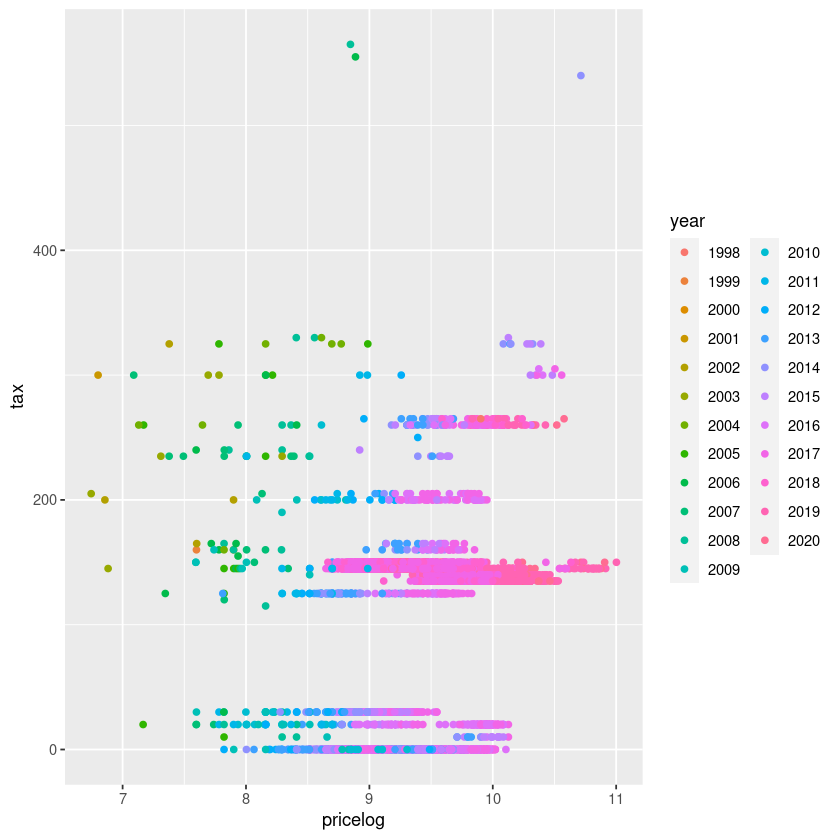

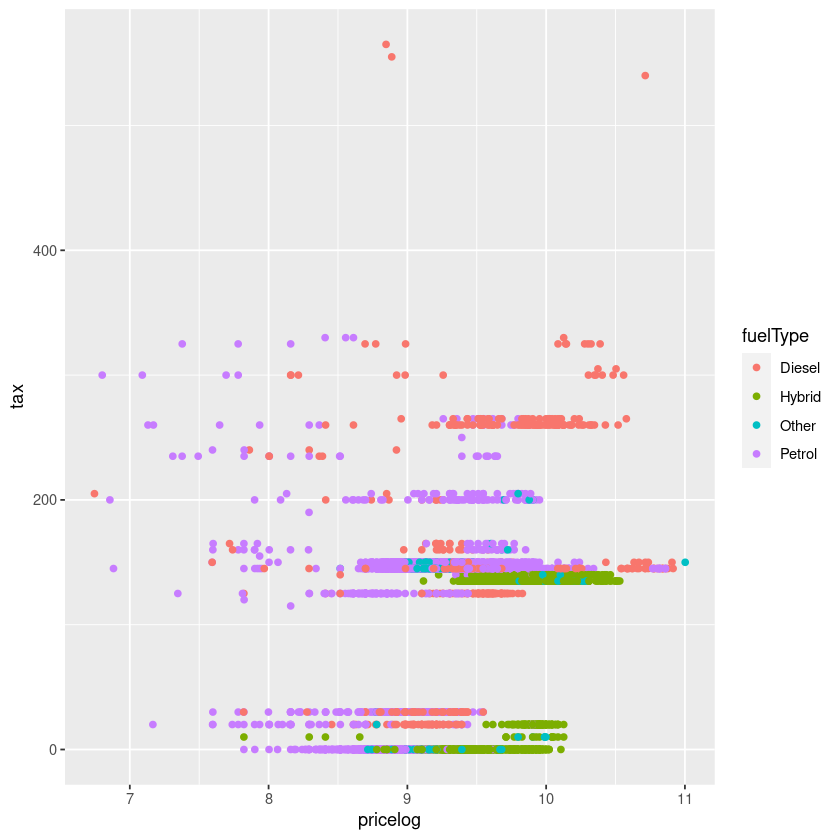

In [89]:
car %>% ggplot(aes(pricelog, tax, color = year)) + geom_point()
car %>% ggplot(aes(pricelog, tax, color = fuelType)) + geom_point()

hibridos tem um tax menor, visto que é calculado pelo co2 emitido, faz sentido. 
o ano também traz uma divisão para o tax. 

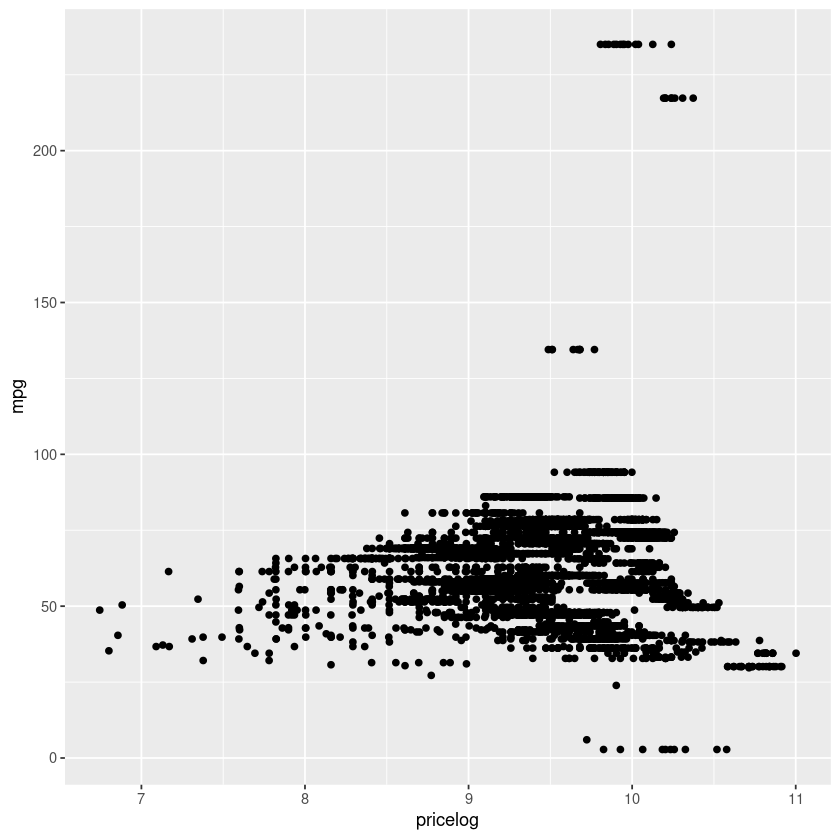

In [90]:
ggplot(car, aes(pricelog, mpg)) + geom_point()


veiculos com alto mpg ou bem baixos tem preços mais elevados, o que faz sentido - pode ser hibrido, que consome menos e por isso é mais caro, ou carros com motor mais forte, o que consome mais, mas tem preços mais elevados pelo motor. Não há uma correlação clara e o cálculo ja havia mostrado isso. 

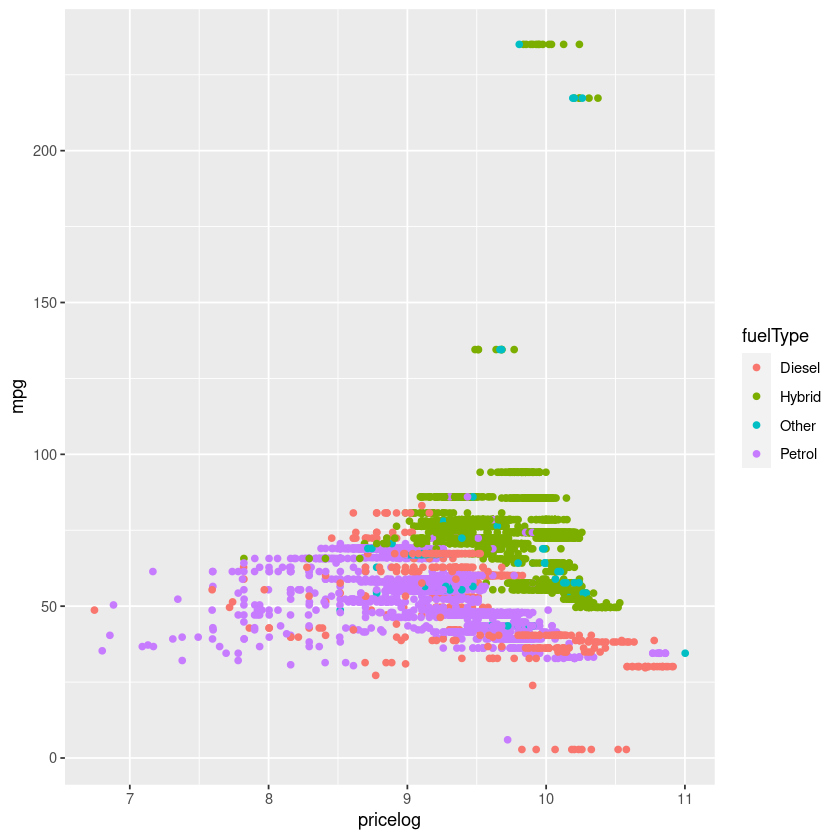

In [91]:
car %>% ggplot(aes(pricelog, mpg, color = fuelType)) + geom_point()


ok, de fato, os com maior mpg (melhor consumo) são hibridos ou 'outro' 

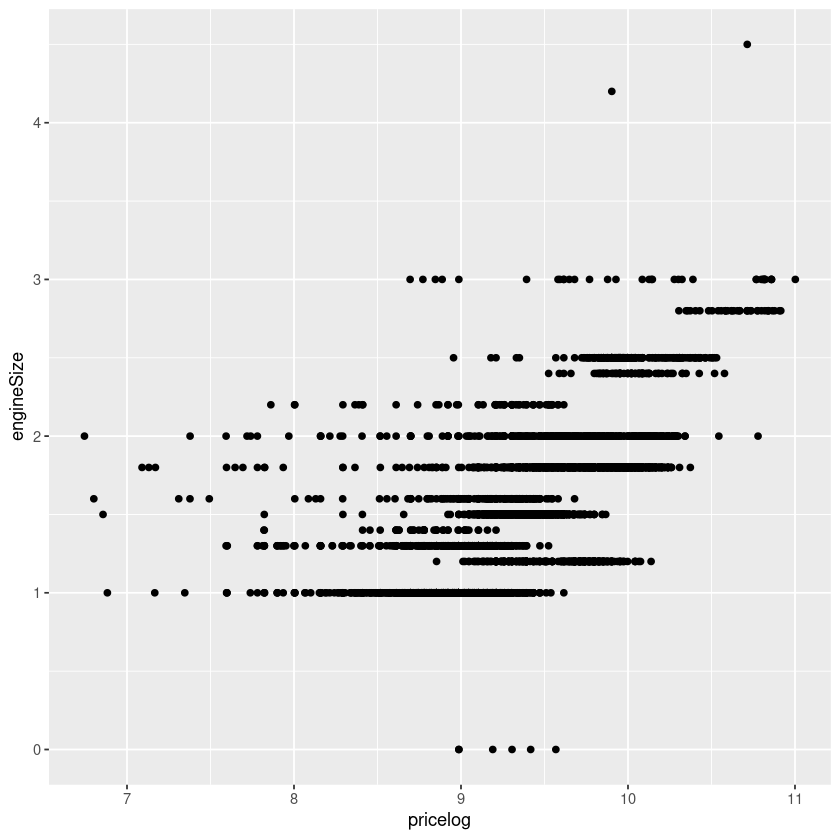

In [92]:
ggplot(car, aes(pricelog, engineSize)) + geom_point()

pela correlação já sabíamos que motores maiores são mais caros, e o senso comum também diz isso, mas o gráfico foi capaz de confirmar.

In [93]:
car %>% filter(engineSize == 0)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog
<chr>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Yaris,2016,12300,Manual,6148,Hybrid,0,86.0,0,9.417355
Yaris,2016,11000,Automatic,39909,Hybrid,0,86.0,0,9.305651
Aygo,2019,9800,Manual,3635,Petrol,150,56.5,0,9.190138
Aygo,2019,8000,Manual,8531,Petrol,145,56.5,0,8.987197
Aygo,2019,8000,Manual,5354,Petrol,145,56.5,0,8.987197
C-HR,2017,14300,Manual,46571,Petrol,145,47.1,0,9.568015


engine size como 0 não parece fazer sentido para mim, mas precisaria de mais informações com a área de negócio para saber se pode ser retirado ou não dos dados. Como a minha intenção é utilizar árvore de decisão, não irei retirar outliers. Em um projeto com área de negócios envolvida, eu iria conversar e discutir a qualidade dos dados com eles. 

após essa análise inicial dos dados, me sinto mais confortável em aplicar modelos para previsão do preço de venda dos veículos, irei iniciar transformando as categoricas em numericas, normalizando os dados pois temos bases bem diferentes, separar a base em treino/teste, definir a formula com as features e aplicar modelos supervisionados, avaliando os resultados.

In [94]:
summary(car)

    model                year          price          transmission 
 Length:6738        2017   :2019   Min.   :  850   Automatic:2657  
 Class :character   2019   :1286   1st Qu.: 8290   Manual   :3826  
 Mode  :character   2018   :1015   Median :10795   Other    :   1  
                    2016   : 997   Mean   :12522   Semi-Auto: 254  
                    2015   : 525   3rd Qu.:14995                   
                    2014   : 352   Max.   :59995                   
                    (Other): 544                                   
    mileage         fuelType         tax             mpg        
 Min.   :     2   Diesel: 503   Min.   :  0.0   Min.   :  2.80  
 1st Qu.:  9446   Hybrid:2043   1st Qu.:  0.0   1st Qu.: 55.40  
 Median : 18513   Other : 105   Median :135.0   Median : 62.80  
 Mean   : 22857   Petrol:4087   Mean   : 94.7   Mean   : 63.04  
 3rd Qu.: 31064                 3rd Qu.:145.0   3rd Qu.: 69.00  
 Max.   :174419                 Max.   :565.0   Max.   :235.00  
 

In [95]:
#não quero perder a base original (apesar do log já ser uma modificação, rs), então copia para car2
car2 <- car[,c(1,2,4:10)]
summary(car2)

    model                year         transmission     mileage      
 Length:6738        2017   :2019   Automatic:2657   Min.   :     2  
 Class :character   2019   :1286   Manual   :3826   1st Qu.:  9446  
 Mode  :character   2018   :1015   Other    :   1   Median : 18513  
                    2016   : 997   Semi-Auto: 254   Mean   : 22857  
                    2015   : 525                    3rd Qu.: 31064  
                    2014   : 352                    Max.   :174419  
                    (Other): 544                                    
   fuelType         tax             mpg           engineSize   
 Diesel: 503   Min.   :  0.0   Min.   :  2.80   Min.   :0.000  
 Hybrid:2043   1st Qu.:  0.0   1st Qu.: 55.40   1st Qu.:1.000  
 Other : 105   Median :135.0   Median : 62.80   Median :1.500  
 Petrol:4087   Mean   : 94.7   Mean   : 63.04   Mean   :1.471  
               3rd Qu.:145.0   3rd Qu.: 69.00   3rd Qu.:1.800  
               Max.   :565.0   Max.   :235.00   Max.   :4.500  


In [96]:
car2$model <- as.factor(car2$model)
labmodel <- LabelEncoder.fit(car2$model)
car2$model <- transform(labmodel, car2$model)

car2$year <- as.numeric(as.character(car2$year))

labtransm <- LabelEncoder.fit(car2$transmission)
car2$transmission <- transform(labtransm, car2$transmission)

labfuel <- LabelEncoder.fit(car2$fuelType)
car2$fuelType <- transform(labfuel, car2$fuelType)

In [97]:
head(car2)

model,year,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
7,2016,2,24089,4,265,36.2,2,9.680344
7,2017,2,18615,4,145,36.2,2,9.680031
7,2015,2,27469,4,265,36.2,2,9.546670
7,2017,2,14736,4,150,36.2,2,9.852089
7,2017,2,36284,4,145,36.2,2,9.769842
7,2017,2,26919,4,260,36.2,2,9.680219


In [98]:
summary(car2)

     model             year       transmission      mileage      
 Min.   : 1.000   Min.   :1998   Min.   :1.000   Min.   :     2  
 1st Qu.: 3.000   1st Qu.:2016   1st Qu.:1.000   1st Qu.:  9446  
 Median : 6.000   Median :2017   Median :2.000   Median : 18513  
 Mean   : 9.106   Mean   :2017   Mean   :1.681   Mean   : 22857  
 3rd Qu.:18.000   3rd Qu.:2018   3rd Qu.:2.000   3rd Qu.: 31064  
 Max.   :18.000   Max.   :2020   Max.   :4.000   Max.   :174419  
    fuelType          tax             mpg           engineSize   
 Min.   :1.000   Min.   :  0.0   Min.   :  2.80   Min.   :0.000  
 1st Qu.:2.000   1st Qu.:  0.0   1st Qu.: 55.40   1st Qu.:1.000  
 Median :4.000   Median :135.0   Median : 62.80   Median :1.500  
 Mean   :3.154   Mean   : 94.7   Mean   : 63.04   Mean   :1.471  
 3rd Qu.:4.000   3rd Qu.:145.0   3rd Qu.: 69.00   3rd Qu.:1.800  
 Max.   :4.000   Max.   :565.0   Max.   :235.00   Max.   :4.500  
    pricelog     
 Min.   : 6.745  
 1st Qu.: 9.023  
 Median : 9.287  
 Mea

deveria normalizar, mas irei ver os resultados sem normalizar primeiro

In [99]:
cor(car2)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog
model,1.0000000000,-0.03456675,-0.06455981,0.009504947,-0.0002648067,0.03322421,-0.143538230,0.21696991,0.064083243
year,-0.0345667540,1.00000000,0.02477167,-0.727749193,0.0980912702,0.28345519,-0.020607407,-0.04556667,0.551281110
transmission,-0.0645598067,0.02477167,1.00000000,-0.069597434,0.5076866756,0.17668583,-0.320906187,-0.40354174,-0.382765515
mileage,0.0095049470,-0.72774919,-0.06959743,1.000000000,-0.2453871937,-0.20528479,0.044889055,0.18261461,-0.392767243
fuelType,-0.0002648067,0.09809127,0.50768668,-0.245387194,1.0000000000,0.10785603,-0.295397918,-0.71078933,-0.518512533
tax,0.0332242083,0.28345519,0.17668583,-0.205284793,0.1078560316,1.00000000,-0.430291566,0.15572684,0.195218113
mpg,-0.1435382295,-0.02060741,-0.32090619,0.044889055,-0.2953979177,-0.43029157,1.000000000,-0.10686831,0.009899686
engineSize,0.2169699062,-0.04556667,-0.40354174,0.182614609,-0.7107893300,0.15572684,-0.106868307,1.00000000,0.686284951
pricelog,0.0640832435,0.55128111,-0.38276551,-0.392767243,-0.5185125333,0.19521811,0.009899686,0.68628495,1.000000000


In [100]:
fmla <- pricelog ~ model + year + transmission + mileage + fuelType + mpg + engineSize + tax

In [101]:
#treino e teste

set.seed(74)

n <- nrow(car2)
sample_rows <- sample(n, 0.75*n)

train <- car2 %>% filter(row_number() %in% sample_rows)
test <- car2 %>% filter(!row_number() %in% sample_rows)

In [102]:
lm1 <- lm(fmla, train)


In [103]:
summary(lm1)


Call:
lm(formula = fmla, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97222 -0.11106 -0.02633  0.09223  1.48039 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.765e+02  3.383e+00 -52.187   <2e-16 ***
model        -4.775e-03  3.775e-04 -12.648   <2e-16 ***
year          9.182e-02  1.677e-03  54.767   <2e-16 ***
transmission -6.169e-02  4.593e-03 -13.430   <2e-16 ***
mileage      -5.912e-06  1.950e-07 -30.324   <2e-16 ***
fuelType     -3.392e-02  3.983e-03  -8.517   <2e-16 ***
mpg           5.624e-04  1.989e-04   2.828   0.0047 ** 
engineSize    7.291e-01  9.767e-03  74.646   <2e-16 ***
tax          -3.273e-04  3.961e-05  -8.263   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1766 on 5044 degrees of freedom
Multiple R-squared:  0.8584,	Adjusted R-squared:  0.8582 
F-statistic:  3823 on 8 and 5044 DF,  p-value: < 2.2e-16


mpg tem um p-value bem maior comparado aos outros, mas como ainda está >5%, será mantido no modelo

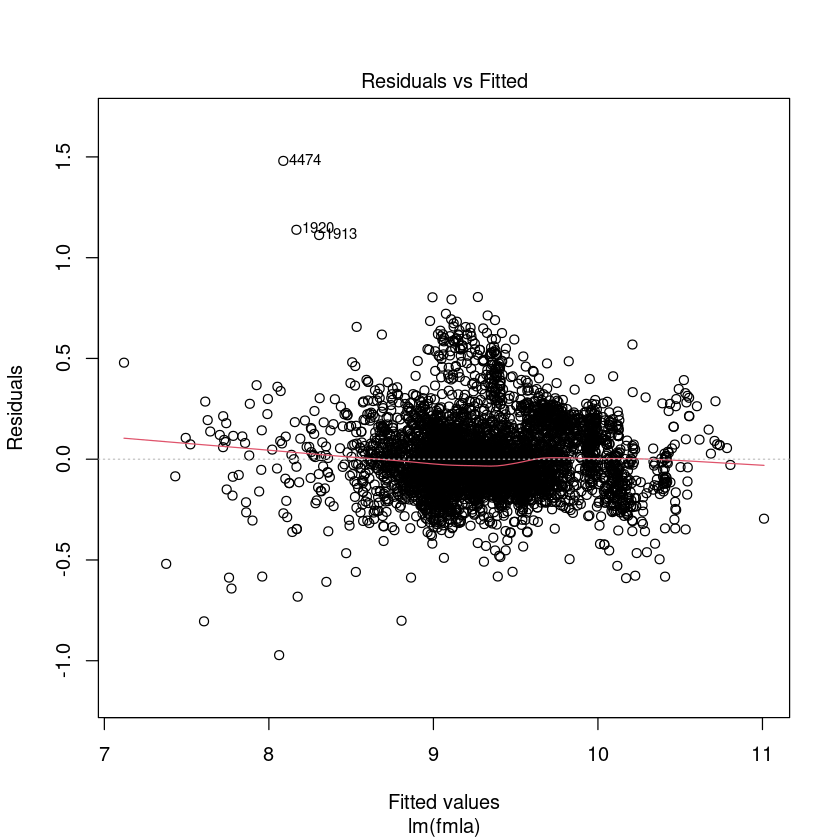

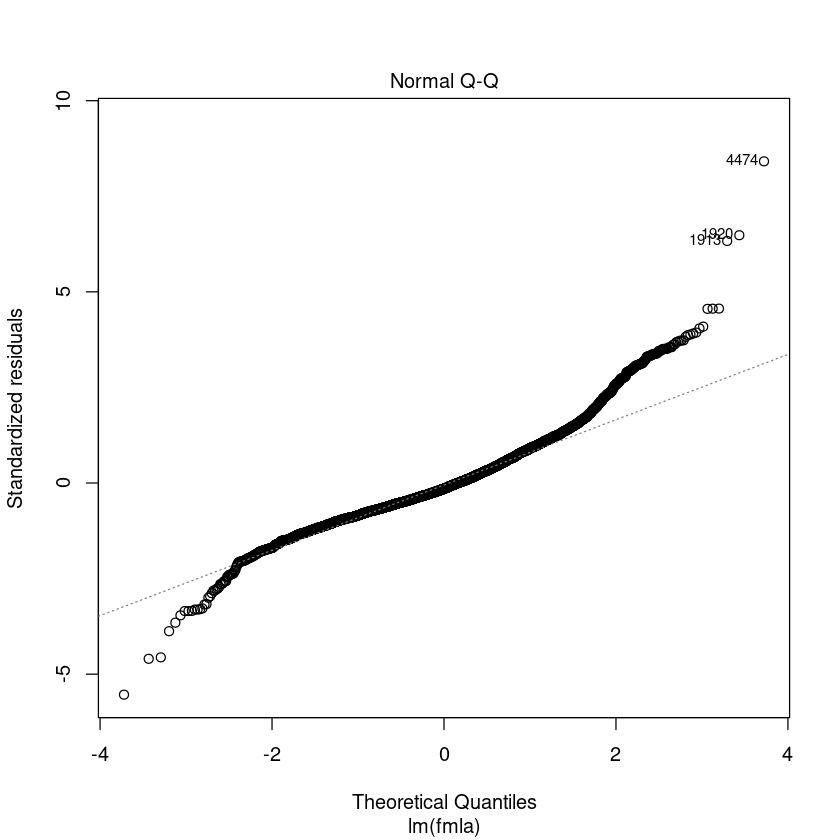

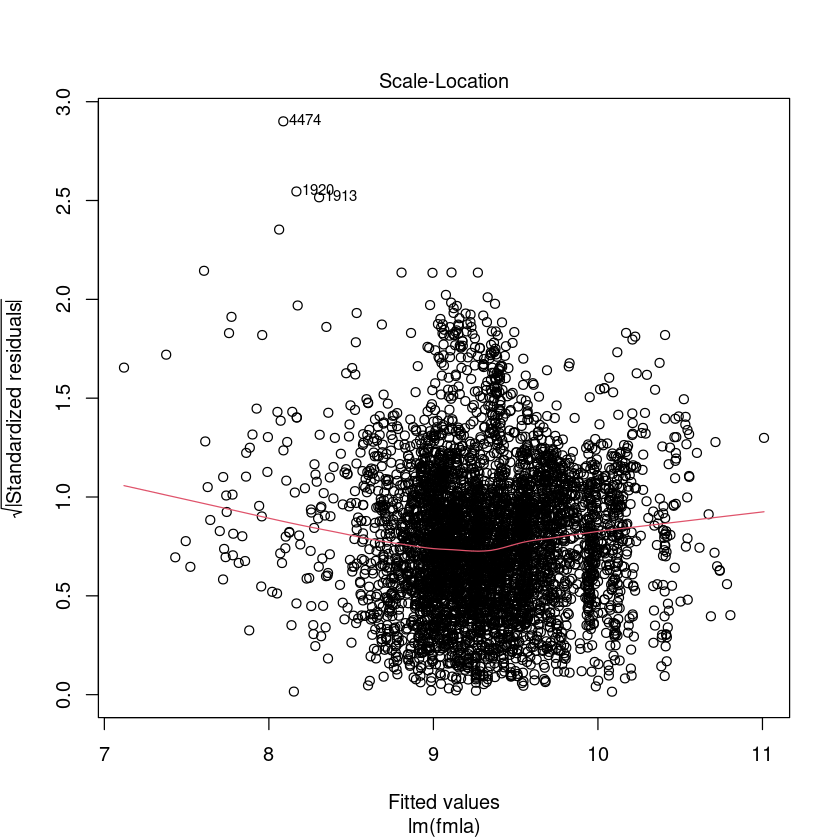

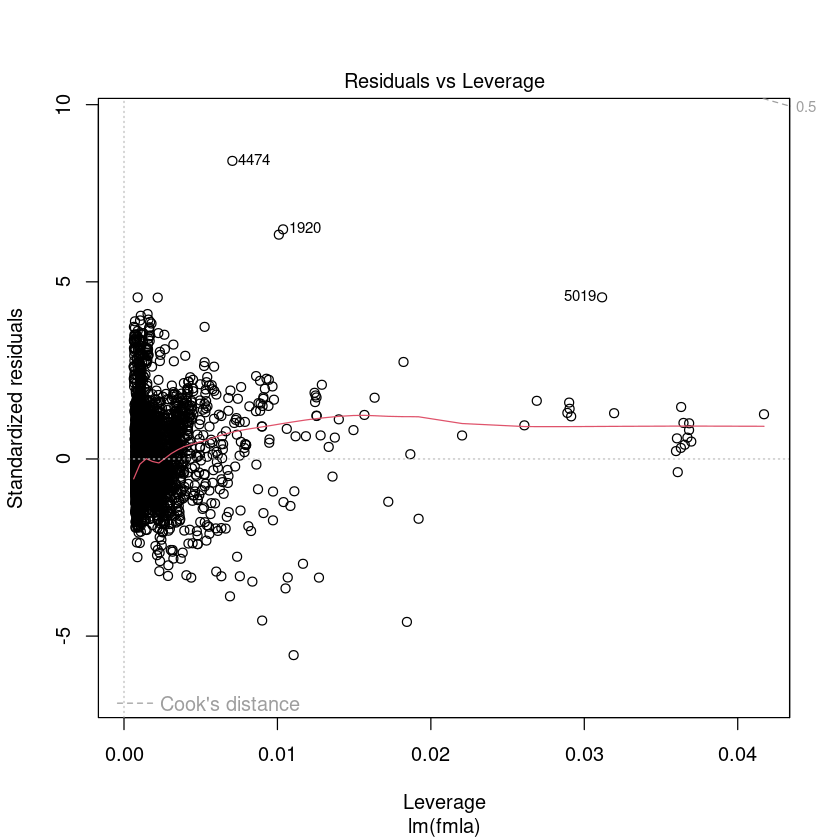

In [104]:
plot(lm1)

In [105]:
predlm1 <- predict(lm1, test)

In [106]:

rmse(test$pricelog, predlm1)


[1] 0.1739547

In [107]:
summary(lm1)$r.squared

[1] 0.8584394

In [108]:
tree1 <- rpart(fmla, train, method = "anova")

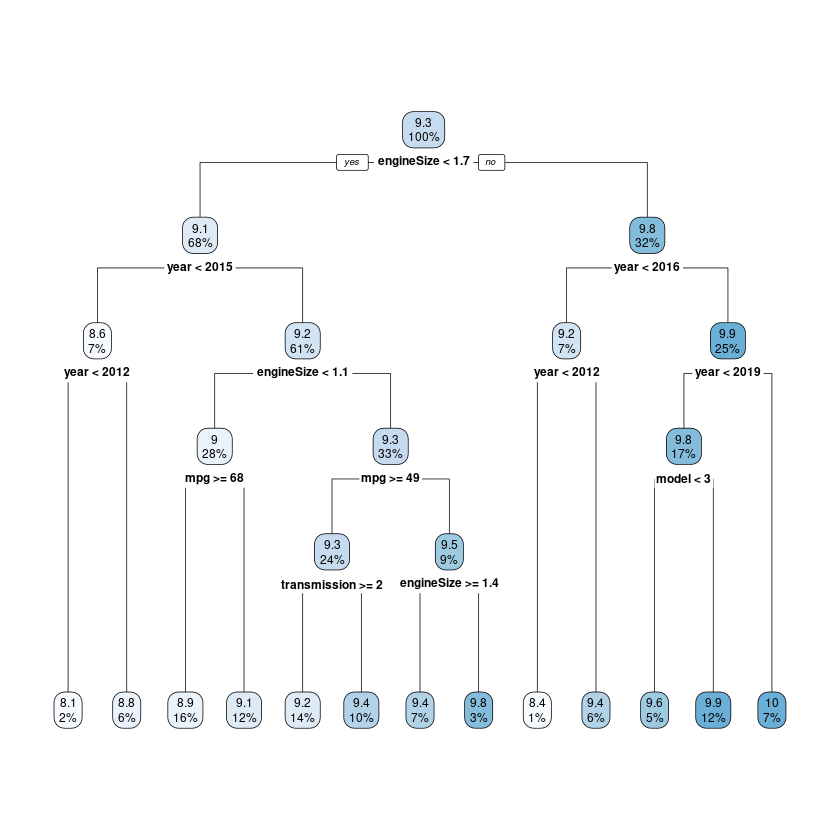

In [109]:
rpart.plot(tree1)

In [110]:
predtree1 <- predict(tree1, test, method = "anova")

In [111]:
rmse(test$pricelog, predtree1)

[1] 0.1906764

In [112]:
R2LM <- cor(test$pricelog, predlm1)^2
R2LM

[1] 0.8652407

In [113]:
R2TREE <- cor(test$pricelog, predtree1)^2
R2TREE

[1] 0.8377786

In [114]:
car2$predlm <- predict(lm1, car2)
car2$predtree <- predict(tree1, car2, method = "anova")

In [115]:
rmse(car2$pricelog, car2$predlm)
rmse(car2$pricelog, car2$predtree)

[1] 0.1758042

[1] 0.1832201

In [116]:
car2$price <- exp(car2$pricelog)
car2$lm <- round(exp(car2$predlm),0)
car2$tree <- round(exp(car2$predtree),0)

In [117]:
car2$difflm <- car2$price - car2$lm
car2$difftree <- car2$price - car2$tree

In [118]:
car2 %>% filter(difflm >= 1500)
car2 %>% filter(difftree >= 1500)

model,year,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog,predlm,predtree,price,lm,tree,difflm,difftree
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,2016,2,24089,4,265,36.2,2,9.680344,9.527142,9.863813,16000,13727,19222,2273,-3222
7,2015,2,27469,4,265,36.2,2,9.546670,9.415339,9.403246,13998,12275,12128,1723,1870
7,2017,2,14736,4,150,36.2,2,9.852089,9.711901,9.863813,18998,16513,19222,2485,-224
7,2017,2,36284,4,145,36.2,2,9.769842,9.586143,9.863813,17498,14562,19222,2936,-1724
7,2017,2,10456,4,145,36.2,2,9.826714,9.738842,9.863813,18522,16964,19222,1558,-700
7,2017,2,12340,4,145,36.2,2,9.851931,9.727703,9.863813,18995,16776,19222,2219,-227
7,2020,2,516,4,150,33.2,2,10.239888,10.069744,10.171877,27998,23618,26157,4380,1841
7,2013,2,72000,4,265,36.2,2,9.258654,8.968427,9.403246,10495,7851,12128,2644,-1633
7,2017,2,36100,4,145,36.2,2,9.740674,9.587231,9.863813,16995,14577,19222,2418,-2227


model,year,transmission,mileage,fuelType,tax,mpg,engineSize,pricelog,predlm,predtree,price,lm,tree,difflm,difftree
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,2015,2,27469,4,265,36.2,2.0,9.546670,9.415339,9.403246,13998,12275,12128,1723,1870
7,2020,2,516,4,150,33.2,2.0,10.239888,10.069744,10.171877,27998,23618,26157,4380,1841
7,2020,2,3000,4,145,33.2,2.0,10.341742,10.056695,10.171877,31000,23311,26157,7689,4843
7,2015,2,30500,4,265,36.2,2.0,9.545455,9.397420,9.403246,13981,12057,12128,1924,1853
7,2015,2,38126,4,260,36.2,2.0,9.546170,9.353971,9.403246,13991,11545,12128,2446,1863
7,2017,2,6445,4,145,36.2,2.0,9.952040,9.762555,9.863813,20995,17371,19222,3624,1773
7,2014,2,18389,4,260,36.2,2.0,9.615739,9.378838,9.403246,14999,11835,12128,3164,2871
7,2020,2,999,4,145,33.2,2.0,10.301223,10.068525,10.171877,29769,23589,26157,6180,3612
7,2019,2,489,4,145,33.2,2.0,10.238172,9.979720,10.171877,27950,21584,26157,6366,1793


In [119]:
nrow(car2 %>% filter(difflm >= 1500))/nrow(car2)
nrow(car2 %>% filter(difftree >= 1500))/nrow(car2)

[1] 0.1951618

[1] 0.1801722

sem normalizar os dados e sem feature engineering, **foi possível acertar mais de 80% dentro do critério de negócio (80,5% em regressão linear e 82% em árvore de decisão)**

próximos passos serão: 

. normalizar os dados a fim de obter um resultado melhor, visto que os resultados estão muito similares com as perdas que eles já vem tendo (18%) 

. utilizar clustering para verificar os grupos mais similares, se houver

. utilizar feature engineering para unir features que possam fazer sentido juntas (por exemplo, criar fatores para tax, ou unificar faixas de mpg com tipo de combustível)